In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义一个基础的 Transformer 模型
class MusicTransformer(nn.Module):
    def __init__(self, feature_size, num_classes, num_heads=4, num_layers=2, dropout=0.1):
        super(MusicTransformer, self).__init__()
        self.embed = nn.Linear(feature_size, feature_size)
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(feature_size, num_classes)

    def forward(self, x):
        # 假设 x 的维度为 (batch_size, sequence_length, feature_size)
        x = self.embed(x)  # 线性层用于特征维度的调整
        x = x.permute(1, 0, 2)  # 调整维度以符合 Transformer 输入要求
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)  # 对序列维度进行平均，用于分类
        x = self.classifier(x)
        return x

# 创建模型实例
feature_size = 12  # 假设特征维度为 10
num_classes = 5   # 假设有 5 个类别
model = MusicTransformer(feature_size, num_classes)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 模拟一些随机数据作为示例
batch_size = 32
sequence_length = 8
data = torch.randn(batch_size, sequence_length, feature_size)
labels = torch.randint(0, num_classes, (batch_size,))
print(data)
print(data.shape)

tensor([[[ 0.8645, -0.9604,  0.6479,  ..., -0.0306, -0.4634, -0.2139],
         [-1.7756,  0.3736, -0.5327,  ...,  0.0622, -0.0450,  0.3024],
         [ 0.1342,  1.6346, -1.1602,  ...,  1.2846, -0.8656, -0.4891],
         ...,
         [-0.4969,  2.0936, -0.0146,  ...,  0.0622,  1.2908,  0.9433],
         [ 1.7050, -0.6364, -2.7957,  ...,  0.9960, -1.4117,  0.7537],
         [ 1.5403, -0.4150,  1.2392,  ...,  0.3647,  2.2697, -1.0428]],

        [[ 1.0432, -1.2039,  0.9774,  ...,  3.1006, -0.5853,  1.2694],
         [-0.9962,  1.7231, -0.6628,  ..., -0.3905,  2.0796,  0.9763],
         [-1.0774,  0.5247,  0.0530,  ..., -0.2097, -0.0495, -0.6792],
         ...,
         [-2.2331,  0.5132, -0.6668,  ...,  0.1516,  0.8890, -0.7754],
         [ 0.8002, -0.9116, -1.5469,  ..., -0.2146, -0.7510,  0.1266],
         [-0.3556, -1.9285,  1.7392,  ...,  1.1319,  0.2130, -1.3954]],

        [[-0.8965,  0.2250, -0.4470,  ..., -0.3166, -0.1447, -1.1427],
         [-0.8171,  1.8621, -0.4181,  ..., -0

/home/s1751118/.local/lib/python3.10/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [4]:
# 训练过程
model.train()
for epoch in range(10):  # 训练 10 个 epoch
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

Epoch 1, Loss: 1.5850192308425903
Epoch 2, Loss: 1.4721674919128418
Epoch 3, Loss: 1.4222235679626465
Epoch 4, Loss: 1.3755425214767456
Epoch 5, Loss: 1.3312842845916748
Epoch 6, Loss: 1.3140437602996826
Epoch 7, Loss: 1.2597897052764893
Epoch 8, Loss: 1.2308610677719116
Epoch 9, Loss: 1.193207025527954
Epoch 10, Loss: 1.1880677938461304


In [5]:
# 函数来评估模型在测试集上的性能
def evaluate_model(model, test_data, test_labels):
    model.eval()  # 将模型设置为评估模式
    with torch.no_grad():  # 关闭梯度计算
        outputs = model(test_data)
        loss = criterion(outputs, test_labels)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == test_labels).sum().item()
        total = test_labels.size(0)
        accuracy = correct / total
    return loss.item(), accuracy

# 创建一些模拟的测试数据
test_data = torch.randn(batch_size, sequence_length, feature_size)
test_labels = torch.randint(0, num_classes, (batch_size,))

# 评估模型
test_loss, test_accuracy = evaluate_model(model, test_data, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.2f}')

Test Loss: 1.7740390300750732, Test Accuracy: 0.12


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5 ,0.5, 0.5], [0.5 ,0.5, 0.5])
])

train_set = tv.datasets.CIFAR10(root='./data', train=True, transform=transform)
image, label = train_set[0]
print(image)
print(label)

train_loader = DataLoader(train_set, shuffle=True, batch_size=64, num_workers=4, drop_last=True)

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

torch.Size([64, 6, 15, 15])


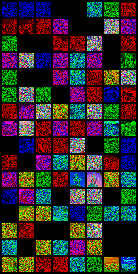

In [9]:
import torch
import torch.nn as nn

class youmeng(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, padding=0, stride=1)
        self.maxpool1=  nn.MaxPool2d(kernel_size=2, ceil_mode=True)
        self.sigmoid1 = nn.Sigmoid()
        self.batchnorm1 = nn.BatchNorm2d(num_features=6)
        self.dropout1 = nn.Dropout2d(p=0.5)
    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.sigmoid1(x)
        x = self.batchnorm1(x)
        x = self.dropout1(x)
        return x

y = youmeng()
dataiter = iter(train_loader)
images, labels = next(dataiter)
outputs = y(images)
print(outputs.shape)
outputs = torch.reshape(outputs, (-1, 3, 15, 15))
show(tv.utils.make_grid(outputs))

In [1]:
import torch.nn as nn
import torch
import torchvision as tv
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
train_set = tv.datasets.CIFAR10('./data', download=True, transform=transform)
test_set = tv.datasets.CIFAR10('./data/', download=True, transform=transform)
trainloader = DataLoader(train_set, batch_size=64)
testloader = DataLoader(test_set, batch_size=64)

# 定义网络
class youmeng(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 5,padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(1024, 64),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

ynet = youmeng()
ynet.to(device)

print(ynet)
loss = nn.CrossEntropyLoss()
loss.to(device)
optim = torch.optim.SGD(ynet.parameters(), lr=0.01)

epoches = 40
for epoch in range(epoches):
    running_loss = 0.0
    
    ynet.train()
    print(f'--------------------------第{epoch + 1}轮训练--------------------------')
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = ynet(images)
        result_loss = loss(outputs, labels)
        
        optim.zero_grad()
        result_loss.backward()
        optim.step()
        running_loss += result_loss
    print(f'Epoch {epoch + 1} loss sum: {running_loss}')
    
    # 测试开始
    correct, total = 0, 0
    ynet.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = ynet(images)
            test_loss = loss(outputs, labels)
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum()
    print(f'第{epoch + 1}轮训练测试集准确率为：{100 * correct / total}')

Files already downloaded and verified
Files already downloaded and verified
youmeng(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1024, out_features=64, bias=True)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)
--------------------------第1轮训练--------------------------
Epoch 1 loss sum: 1562.3238525390625
第1轮训练测试集准确率为：37.06399917602539
--------------------------第2轮训练--------------------------
Epoch 2 loss sum: 1276.6190185546875
第2轮训练测试集准确率为：43.655998229

In [2]:
torch.save(ynet, './models/ynet.pth')

In [3]:
model = torch.load('./models/ynet.pth')
print(model)

youmeng(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1024, out_features=64, bias=True)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [4]:
torch.cuda.is_available()

True

In [21]:
from PIL import Image
from torchvision.transforms import ToPILImage

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

image_path = './data/horse.jpg'
image_test = Image.open(image_path)
image_tensor = transform(image_test)

show = ToPILImage()

model = torch.load('./models/ynet.pth', map_location='cpu')
print(model)

model.eval()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog' ,'horse', 'ship', 'truck']
with torch.no_grad():
    image_tensor = torch.reshape(image_tensor, (1, 3, 32, 32))
    outputs = model(image_tensor)
    print(labels[outputs.argmax()])

youmeng(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1024, out_features=64, bias=True)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)
horse
